# Estimating Pi With Py


Using the [Monte Carlo method](https://en.wikipedia.org/wiki/Monte_Carlo_method) (repeated random sampling to estimate some numerical result) we can estimate the value of $\pi$. To make it more fun, I wrote the code to match the classic heuristic example: throwing darts at a dart board. 

### How does one estimate $\pi$ with darts? 
Imagine we have a round dart board hung up on a wall, with a square backdrop no longer than the length of the round dart board. Suppose you were able to throw darts at this board such that the dart *always* landed within the square, whether or not on the dart board. 

![dart board](https://www.i2clipart.com/cliparts/e/d/b/2/clipart-dartboard-256x256-edb2.png)

Each time you throw a dart, you know whether or not it made it in on to the board.
If we throw *a lot* of darts, then we can **estimate the area of the dart board** by taking the proportion of darts that landed on the board divided by the total number of darts thrown. This estimate gets better as more darts are thrown. If we can **estimate the area of the circular board**, and we can measure the radius, then using the formula for the area of a circle, we can estimate $\pi$
$$A = \pi r^2 \rightarrow  \pi = A/r^2$$
 

Instead of having to buy darts, we can have python throw them for us! I wrote a [small python script](https://github.com/jacksonrgwalker/pi-dart/blob/main/darts.py) that let's us play with darts (random points) on a board (the unit circle) with a backdrop (the unit square)

In [2]:
import random
random.seed(42) #set seed to get determined results

We can create a dart, and throw it at the board. It will land in a random spot. 

In [3]:
from darts import Dart

my_dart = Dart.throw() # throws the dart, lands in random spot on the unit square

my_dart

Dart(x=0.2788535969157675, y=-0.9499784895546661)

In [4]:
# distance from the origin to where the dart landed
my_dart.distance_from_origin() 

0.9900598260354908

We can also make a lot of darts and throw them all at the same time...

In [5]:
from darts import DartSet

In [6]:
radius = 1 # unit circle
n = 250_000 # lots of darts!

In [7]:
%%time 

random_points = DartSet.throw_all(n=n) # throw all the darts! 

# check if the dart landed in the unit circle
within_circle = [dist < radius for dist in random_points.distance_from_origin()] 

# adds up the number of true values, i.e. the ones in the unit circle
darts_in_circle = sum(within_circle) 
#total number of darts thrown (in or out of the circle)
total_darts = len(within_circle) 

# forms a 2x2 box (from -1 to 1 for x and y)
area_of_unit_square = 4 

# this estimates the unit circle area divided by the unit square area
circle_proportion_of_square = darts_in_circle / total_darts 

# we know the unit square area, leaving us with the area of the unit circle
area_of_unit_circle_estimate = circle_proportion_of_square * area_of_unit_square 

Wall time: 549 ms


Since the area of circle with radius $r$ is given by $\pi r^2 $, our estimate for $\pi$ is the just the area of the unit circle, where the radius is $1$

In [8]:
pi_estimate = area_of_unit_circle_estimate
print(f'The estimate for pi is {pi_estimate}')

The estimate for pi is 3.140128


Here is a plot of all of our dart throws. The ones that landed on the board are yellow, the others are purple. 

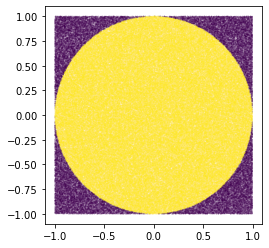

In [9]:
import matplotlib.pyplot as plt
plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(random_points.x, random_points.y, c = within_circle, s=.005)
plt.show()

If we really wanted to speed things up, we can use library like `numpy`.

In [10]:
import numpy as np

In [11]:
%%time 

x, y = np.random.uniform(low=0, high=1, size=(2, n))

distance_from_origin = np.sqrt(np.square(x) + np.square(y))

in_unit_circle = distance_from_origin < 1

pi_estimate = in_unit_circle.sum() / len(in_unit_circle) * area_of_unit_square

print(f'The estimate for pi is {pi_estimate}')

The estimate for pi is 3.144608
Wall time: 5.98 ms


Wow! This is around 100x faster than my own vanilla implementation.